In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'

tables = pd.read_html(url)

table = None
for t in tables:
    if 'Регіон' in t.columns and '1950' in t.columns:
        table = t
        break

if table is not None:
    print(table.head())
else:
    print("Таблиця не знайдена.")

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [149]:
if table is not None:
    print("Розмір датафрейму (рядки, стовпці):", table.shape)

Розмір датафрейму (рядки, стовпці): (28, 9)


In [150]:
if table is not None:
    table.replace("—", np.nan, inplace=True)  # Замінюємо "—" на NaN
    print(table.head())  # Перевіряємо перші рядки

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82  NaN


In [151]:
if table is not None:
    print(table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [152]:
if table is not None:
    numeric_columns = table.columns.drop("Регіон")  # Визначаємо стовпці, які треба конвертувати
    table[numeric_columns] = table[numeric_columns].apply(pd.to_numeric, errors='coerce') # Перетворюємо колонки на числові
    print(table.dtypes) # Перевіряємо результат

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object


In [158]:
if table is not None:
    missing_fraction = table.isnull().sum() / table.shape[0]  # Кількість NaN / загальну кількість рядків
    print(missing_fraction)

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [160]:
if table is not None:
    table = table.drop(table.index[-1])  # Видаляємо рядок за його індексом
    print(table.tail())  # Перевіряємо результат

          Регіон   1950   1960   1970  1990  2000  2012   2014   2019
22     Черкаська  205.0  179.0  144.0   123    75   100   98.0   64.0
23   Чернівецька  247.0  218.0  170.0   148   101   128  129.0   92.0
24  Чернігівська  220.0  183.0  127.0   108    69    94   90.0   61.0
25          Київ    NaN  174.0  159.0   120    73   120  121.0  110.0
26   Севастополь    NaN    NaN    NaN   125    70   120    NaN    NaN


In [162]:
if table is not None:
    numeric_columns = table.columns.drop("Регіон")  # Визначаємо числові колонки
    table[numeric_columns] = table[numeric_columns].fillna(table[numeric_columns].mean()) # Замінюємо NaN на середні значення в кожному стовпці
    print(table.head())  # Перевіряємо результат

             Регіон   1950   1960   1970  1990  2000  2012    2014        2019
0              Крим  230.0  206.0  160.0   130    73   126  111.44   80.173913
1         Вінницька  224.0  192.0  142.0   124    84   112  109.00   76.000000
2         Волинська  247.0  250.0  179.0   153   112   148  141.00  101.000000
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.00   71.000000
4          Донецька  271.0  214.0  140.0   109    61    98   82.00   80.173913


In [164]:
if table is not None:
    avg_birth_rate_2019 = table["2019"].mean()  # Обчислюємо середнє значення
    high_birth_regions = table[table["2019"] > avg_birth_rate_2019]["Регіон"]  # Фільтруємо регіони
    print(high_birth_regions.tolist())  # Виводимо список регіонів, де рівень народжуваності був вищим за середній

['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [166]:
if table is not None:
    max_birth_region_2014 = table.loc[table["2014"].idxmax(), "Регіон"]  # Знаходимо регіон з максимумом
    print("Регіон з найвищою народжуваністю у 2014 році:", max_birth_region_2014)

Регіон з найвищою народжуваністю у 2014 році: Рівненська


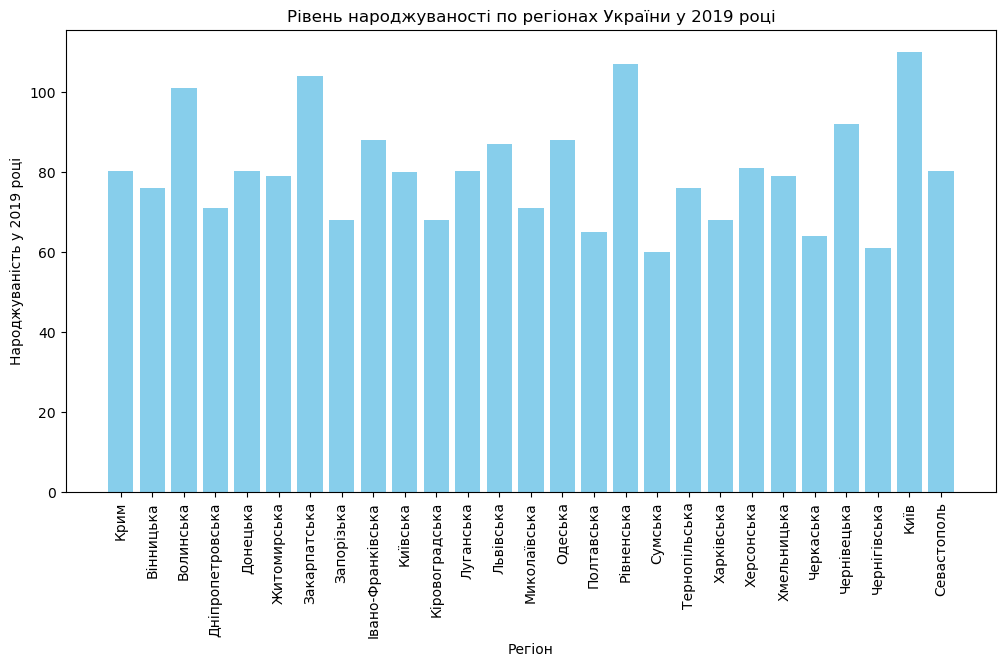

In [168]:
if table is not None:
    plt.figure(figsize=(12, 6))  # Задаємо розмір графіка
    plt.bar(table["Регіон"], table["2019"], color='skyblue')  # Створюємо стовпчикову діаграму
    plt.xticks(rotation=90)  # Повертаємо назви регіонів вертикально для кращої читабельності
    plt.xlabel("Регіон")
    plt.ylabel("Народжуваність у 2019 році")
    plt.title("Рівень народжуваності по регіонах України у 2019 році")
    plt.show()

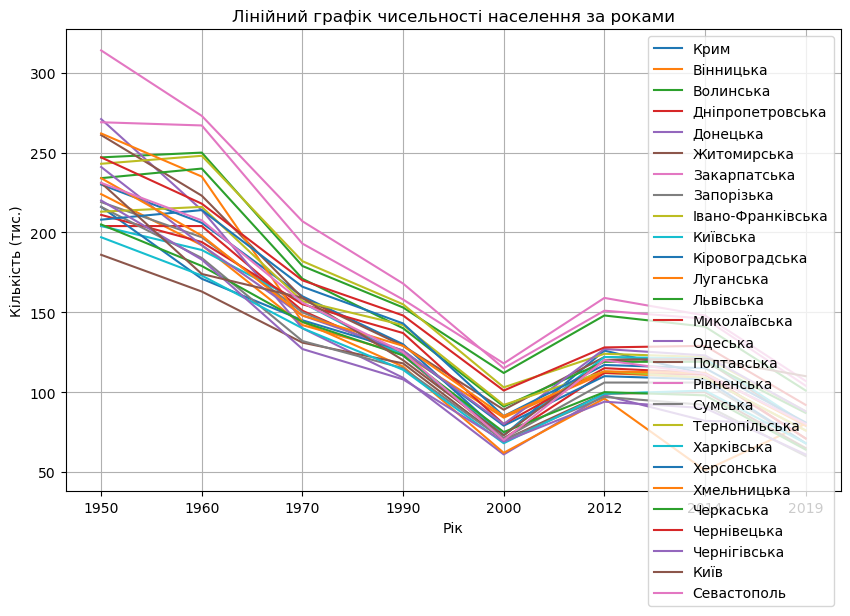

In [170]:
plt.figure(figsize=(10, 6))
for index, row in table.iterrows():
    plt.plot(table.columns[1:], row[1:], label=row['Регіон'])
plt.title('Лінійний графік чисельності населення за роками')
plt.xlabel('Рік')
plt.ylabel('Кількість (тис.)')
plt.legend()
plt.grid(True)
plt.show()

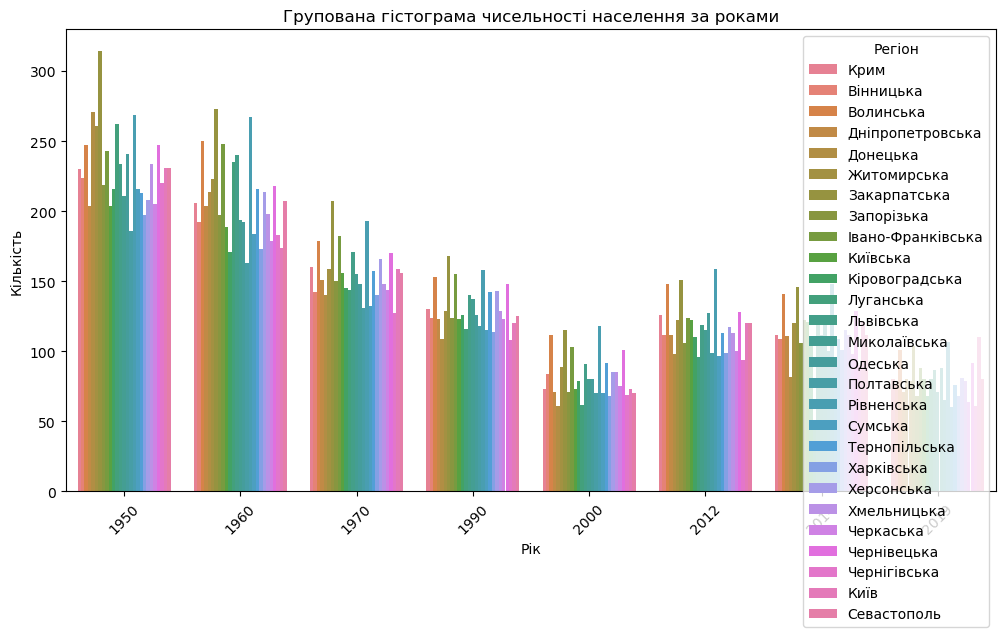

In [174]:
table_melted = table.melt(id_vars=['Регіон'], var_name='Рік', value_name='Кількість')
plt.figure(figsize=(12, 6))
sns.barplot(data=table_melted, x='Рік', y='Кількість', hue='Регіон')
plt.title('Групована гістограма чисельності населення за роками')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

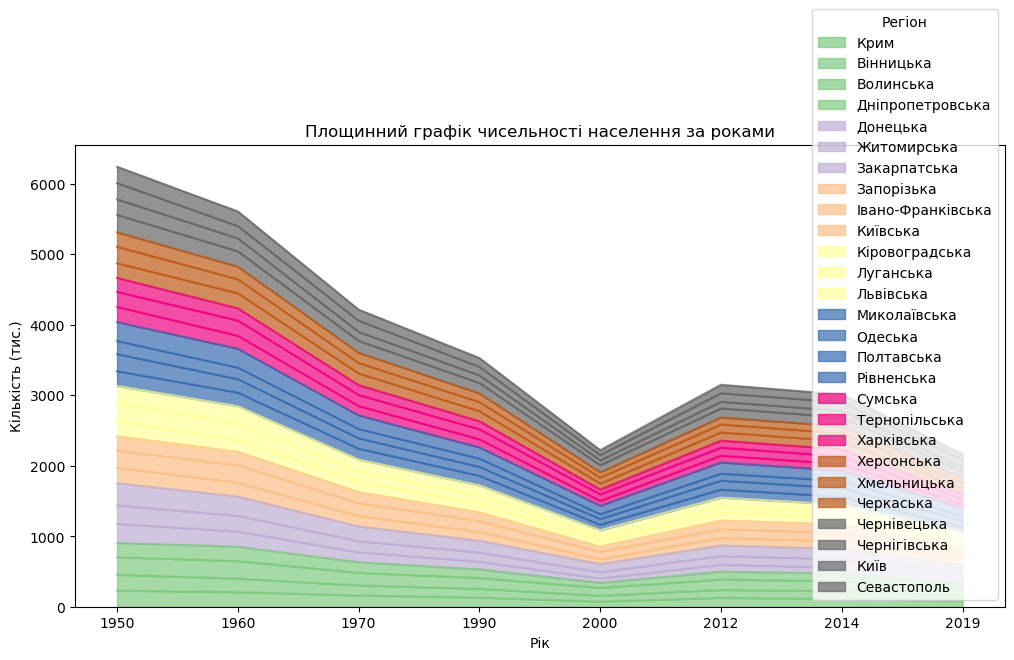

In [176]:
plt.figure(figsize=(12, 6))
table_numeric = table.set_index('Регіон').T
table_numeric.plot(kind='area', stacked=True, alpha=0.7, colormap='Accent', figsize=(12, 6))
plt.title('Площинний графік чисельності населення за роками')
plt.xlabel('Рік')
plt.ylabel('Кількість (тис.)')
plt.show()